In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Stratified k-Fold Cross-Validation

* Podział zbioru danych na k foldów, może nie zawsze być dobrym pomysłem. 
* Na przykład rzućmy okiem na zestaw danych tęczówki:

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
print("Iris labels:\n{}".format(iris.target))

Iris labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


* Jak widać:
    * pierwsza jedna trzecia z danych to klasa 0, 
    * druga trzecia to klasa 1, 
    * a ostatnia trzecia to klasa 2. 

* Wyobraź sobie trzykrotną walidację krzyżową na tym zestawie danych. 

* Pierwszy fold mugłby zawierać tylko klasą 0 i gdy stał by się zbiorem testowym zawierał by tylko klasę 0, a zestaw treningowy zawierał by tylko klasy 1 i 2. 

* Ponieważ klasy w trejnie i teście byłyby różne to acuracy wyszło by zero. 

* To nie jest bardzo pomocne, ponieważ możemy zrobić o wiele lepiej niż 0%.

## Stratified k-fold cross-validation

* **scikit-learn** nie używa **k-Fold Cross-Validation**  do klasyfikacji, ale raczej używa {\bf stratified k-fold cross-validation }

* W **stratified k-fold cross-validation** dzielimy dane tak, aby proporcje między klasami były taka same w każdym foldzie jak w całym zbiorze danych.

In [3]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# create a synthetic dataset
X, y = make_blobs(random_state=0)


In [5]:
# split data and labels into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# instantiate a model and fit it to the training set
logreg = LogisticRegression().fit(X_train, y_train)
# evaluate the model on the test set
print("Test set score: {:.2f}".format(logreg.score(X_test, y_test)))

Test set score: 0.88


Cross-validation jest zaimplementowane w scikit-learn przy pomocy funkcji **cross_val_score** z modułu **model_selection**.

Parametry funkcji **cross_val_score** to model, który chcemy ocenić, dane treningowe i prawdziwe etykiety. 

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression()

In [9]:
scores = cross_val_score(logreg, iris.data, iris.target)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.96078431 0.92156863 0.95833333]


* Domyślnie cross_val_score wykonuje trzykrotną cross-validation, zwracając trzy wartości dokładności. 

* Możemy zmienić liczbę fałd używanych przez zmianę parametru cv:

In [10]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [1.         0.96666667 0.93333333 0.9        1.        ]


Popularnym sposobem podsumowania cross-validation jest obliczenie średniej:

In [11]:
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.96


* Stosując średnią uśrednienie validacji krzyżowej możemy wywnioskować, że spodziewamy się, że model będzie średnio miał około 96% dokładny. 

* Patrząc na wszystkie pięć wyników uzyskanych przez pięciokrotną walidację krzyżową, możemy również stwierdzić, że istnieje stosunkowo duża różnica w dokładności między fałdami, począwszy od 100% dokładności do 90% dokładności. 

* Może to oznaczać, że model jest bardzo zależny od poszczególnych foldów używanych do uczenia, ale może to być również konsekwencja niewielkiego rozmiaru zbioru danych.


### Stratified k-fold cross-validation

* Ponieważ prosta strategia **k-Fold Cross-Validation** może doprowadzić do podziału w którym w jednym foldzie znajduje się tylko jedna klasa **scikit-learn** nie używa **k-Fold Cross-Validation**  do klasyfikacji, ale raczej używa **stratified k-fold cross-validation**

* W **stratified k-fold cross-validation** dzielimy dane tak, aby proporcje między klasami były taka same w każdym foldzie jak w całym zbiorze danych.


* Na przykład, jeśli 90\% twoich próbek należy do klasy A, a 10\% twoich próbek należy do klasy B, to wszystkie foldy zawierają 90\% próbek należy do klasy A, a 10\% próbek należy do klasa B.

In [5]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

print("Cross-validation scores:\n{}".format(
cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[1.         0.93333333 0.43333333 0.96666667 0.43333333]


In [7]:
kfold = KFold(n_splits=3)
print("Cross-validation scores:\n{}".format(cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[0. 0. 0.]


In [ ]:
Remember: each fold corresponds to one of the classes in the iris dataset, and so
nothing can be learned. Another way to resolve this problem is to shuffle the data
instead of stratifying the folds, to remove the ordering of the samples by label. We can
do that by setting the shuffle parameter of KFold to True. If we shuffle the data, we
also need to fix the random_state to get a reproducible shuffling. Otherwise, each run
of cross_val_score would yield a different result, as each time a different split would
be used (this might not be a problem, but can be surprising). Shuffling the data before
splitting it yields a much better result:

# shuffle

* Innym sposobem aby rozwiązać ten problem jest użycie parametru **shuffle** w **KFold** na **True**. 

* Jeśli używamy parametru **shuffle** musimy również naprawić **random_state** aby uzyskać odtwarzalne wyniki. 

* W przeciwnym razie każdy przebieg **cross_val_score** dałby inny wynik ponieważ za każdym razem byłby inny podział. 



In [8]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("Cross-validation scores:\n{}".format( cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[0.9  0.96 0.96]


# Leave-one-out cross-validation

* Inną często używaną metodą sprawdzania poprawności modleu jest metoda **Leave-one-out cross-validation**. 

* Możesz myślec o **Leave-one-out cross-validation** jako o klasycznej metodzie **k-Fold Cross-Validation**, gdzie każdy fold jest pojedynczą próbką. 

* Dla każdego podziału wybierasz jeden punkt danych, który ma być zestawem testowym. 

* Może to być bardzo czasochłonne, szczególnie w przypadku dużych zestawów danych, ale czasami zapewnia lepsze wyniki.

In [9]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("Number of cv iterations: ", len(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))

Number of cv iterations:  150
Mean accuracy: 0.95


# Cross-validation with groups

* Aby to osiągnąć, możemy użyć {\bf GroupKFold}, który przyjmuje tablicę grup jako argument, który możemy wykorzystać do wskazania, która osoba jest na obrazie. 

* Tablica grup wskazuje grupy w danych, które nie powinny być rozdzielane podczas tworzenia zestawów treningowego i testowego.

In [11]:
from sklearn.model_selection import GroupKFold


# create synthetic dataset
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=12, random_state=0)
# assume the first three samples belong to the same group,
# then the next four, etc.
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups, cv=GroupKFold(n_splits=3))
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[0.75       0.8        0.66666667]


# Grid Search

* Teraz, gdy wiemy, jak ocenić, jak dobrze model się generalizuje, możemy zrobić kolejny krok i poprawić wydajność generalizacji modelu poprzez dobranie optymalnych parametrów. 

* Najczęściej stosowaną metodą jest **Grid Search**, co w zasadzie oznacza sprawdzenie wszystkich możliwych kombinacji parametrów będących przedmiotem zainteresowania.

* Rozważmy przypadek jądra SVM z jądrem RBF zaimplementowanym w klasie SVC. 

* Jak już wiemy istnieją dwa ważne parametry: 
  * parametr szerokości jądra -- gamma 
  * parametr regularyzacji C. 

* Powiedzmy, że chcemy wypróbować wartości 0,001, 0,01, 0,1, 1, 10 i 100 dla parametru C, i to samo dla gamma. 

* Ponieważ mamy sześć różnych wartości dla C i gamma, które chcemy wypróbować mamy 36 kombinacji parametrów. 

* Przeglądając wszystkie możliwe kombinacje tworzy tabelę (lub grid) ustawień parametrów SVM.

# Simple Grid Search

In [14]:
# naive grid search implementation
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
print("Size of training set: {} size of test set: {}".format( X_train.shape[0], X_test.shape[0]))


Size of training set: 112 size of test set: 38


In [15]:
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svm.score(X_test, y_test)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            
print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))


Best score: 0.97
Best parameters: {'C': 100, 'gamma': 0.001}


* Biorąc pod uwagę ten wynik, możemy pokusić się o zgłoszenie, że znaleźliśmy model, który działa z 97% dokładnością na naszym zestawie danych. 

* Jednak twierdzenie to może być zbyt optymistyczne (lub po prostu złe), z następującego powodu: 
  * próbowaliśmy wielu różnych parametrów i wybraniu jedne z najlepszą dokładnością na zbiorze testowym, ale dokładność nie musi przenieść się na nowe dane. 
  * Ponieważ użyliśmy danych testowych do dostosowania parametrów, nie możemy już ich użyć do oceny, jak dobry jest model. Z tego samego powodu musieliśmy najpierw podzielić dane na test i train.

* do uczciwej oceny potrzebujemy niezależnego zestawu danych, który nie został użyty do stworzenia modelu.

* Jednym ze sposobów rozwiązania tego problemu jest ponowne podzielenie danych, więc mamy trzy zestawy: 
  * zestaw uczacy do zbudowania modelu, 
  * zestaw validujący do sprawdzania poprawności, aby wybrać parametry modelu 
  * zestaw testowy do oceny wydajności wybranych parametrów.

In [20]:
from sklearn.svm import SVC
# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)
# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split( X_trainval, y_trainval, random_state=1)
print("Size of training set: {} size of validation set: {} size of test set:"
" {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

Size of training set: 84 size of validation set: 28 size of test set: 38



In [21]:
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svm.score(X_valid, y_valid)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

In [22]:
# rebuild a model on the combined training and validation set,
# and evaluate it on the test set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Best score on validation set: 0.96
Best parameters:  {'C': 10, 'gamma': 0.001}
Test set score with best parameters: 0.92


* Po wybraniu najlepszych parametrów za pomocą zestawu walidującego, możemy przeuczyć model przy użyciu parametrów, które znaleźliśmy, ale teraz uczymy zarówno na danych treningowe jak walidacyjnych. 

* W ten sposób możemy wykorzystać jak najwięcej danych do zbudowania naszego modelu.

# Grid Search with Cross-Validation 


Metoda oparta na podzile znioru danych na 
* training set
* validation set
* test set

jest możliwy do wykonania i często stosowany.

* Niestety jest bardzo wrażliwy na to jak dane są dzielone. 

Aby lepiej oszacować wydajność generalizacji, zamiast pojedynczego podziału na treinie i walidzie, możemy użyć Cross-Validation  do oceny wydajności każdej kombinacji parametrów. 

In [23]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters,
        # train an SVC
        svm = SVC(gamma=gamma, C=C)
        # perform cross-validation
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # compute mean cross-validation accuracy
        score = np.mean(scores)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            

In [24]:
# rebuild a model on the combined training and validation set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [25]:
test_score = svm.score(X_test, y_test)
print("Test set score with best parameters: {:.2f}".format(test_score))

Test set score with best parameters: 0.97


Ponieważ **grid search with cross-validation** jest tak powszechnie stosowaną metodą wyszukania parametrów, scikit-learn dostarcza klasę **GridSearchCV**.

In [31]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
iris.data, iris.target, random_state=0)

In [34]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [36]:
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test set score: 0.97


* Wybierając parametry za pomocą **grid search with cross-validation** znaleźliśmy model, który osiągnął 97% dokładność w zestawie testowym. 

* Znalezione parametry są oceniane w atrybucie bes_params_, a najlepsza dokładność cross-validation (średnia dokładność dla różnych podziałów dla tego ustawienia parametru) jest przechowywana w best_score_

In [37]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'gamma': 0.01}
Best cross-validation score: 0.97


* Czasami pomocne jest uzyskanie dostępu do rzeczywistego modelu, który został znaleziony - na przykład, aby spojrzeć na współczynniki lub ważność współrzednych.

* Możesz uzyskać dostęp do modelu z najlepszymi parametrami nauczony na całym zestawie treningowym za pomocą atrybutu **best
_estimator_**

In [39]:
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Best estimator:
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


# Analizowanie wyników cross-validacji

* Często pomocne jest zwizualizowanie wyników walidacji krzyżowej, aby zrozumieć, w jaki sposób generalizacja modelu zależy od parametrów, które przeszukujemy. 

* Ponieważ wyszukiwanie w gridzie jest dość kosztowne obliczeniowo, często dobrym pomysłem jest rozpoczęcie od stosunkowo grubej i małej siatki. 

* Możemy następnie sprawdzić wyniki i ewentualnie rozszerzyć nasze wyszukiwanie. 

* Wyniki wyszukiwania można znaleźć w atrybucie cv_results_, który jest słownikiem przechowującym wszystkie aspekty wyszukiwania. 


In [40]:
import pandas as pd
# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.001001,0.0002,0.366071,0.366079,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000633,0.000400,0.011371,0.002852
1,0.000800,0.0002,0.366071,0.366079,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000400,0.000401,0.011371,0.002852
2,0.000601,0.0004,0.366071,0.366079,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000490,0.000490,0.011371,0.002852
3,0.001002,0.0000,0.366071,0.366079,0.001,1,"{'C': 0.001, 'gamma': 1}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000001,0.000000,0.011371,0.002852
4,0.000400,0.0004,0.366071,0.366079,0.001,10,"{'C': 0.001, 'gamma': 10}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000490,0.000490,0.011371,0.002852


* Podczas przeszukiwania dwuwymiarowej siatki parametrów (C i gamma) najlepiej ją zwizualizować ją jako mapę cieplną. 

* Najpierw wyodrębniamy średnią ocenę walidacji, a następnie przekształcamy wyniki tak, aby osie odpowiadały C i gamma:

In [43]:
def heatmap(values, xlabel, ylabel, xticklabels, yticklabels, cmap=None,
            vmin=None, vmax=None, ax=None, fmt="%0.2f"):
    if ax is None:
        ax = plt.gca()
    # plot the mean cross-validation scores
    img = ax.pcolor(values, cmap=cmap, vmin=vmin, vmax=vmax)
    img.update_scalarmappable()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(np.arange(len(xticklabels)) + .5)
    ax.set_yticks(np.arange(len(yticklabels)) + .5)
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)
    ax.set_aspect(1)

    for p, color, value in zip(img.get_paths(), img.get_facecolors(),
                               img.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.mean(color[:3]) > 0.5:
            c = 'k'
        else:
            c = 'w'
        ax.text(x, y, fmt % value, color=c, ha="center", va="center")
    return img

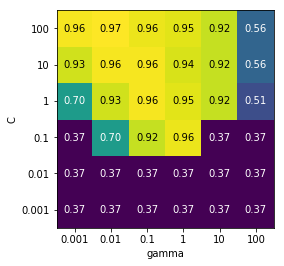

In [44]:
scores = np.array(results.mean_test_score).reshape(6, 6)
# plot the mean cross-validation scores
heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'], ylabel='C', yticklabels=param_grid['C'], cmap="viridis")
plt.show()

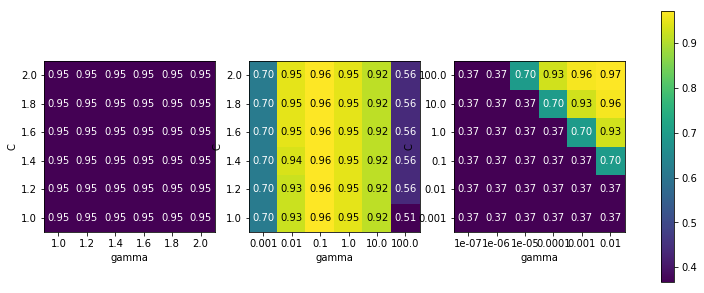

In [48]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
param_grid_linear = {'C': np.linspace(1, 2, 6), 
                     'gamma': np.linspace(1, 2, 6)}
param_grid_one_log = {'C': np.linspace(1, 2, 6),
                      'gamma': np.logspace(-3, 2, 6)}
param_grid_range = {'C': np.logspace(-3, 2, 6),
                    'gamma': np.logspace(-7, -2, 6)}
for param_grid, ax in zip([param_grid_linear, param_grid_one_log,
    param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)
    # plot the mean cross-validation scores
    scores_image = heatmap(
        scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],
        yticklabels=param_grid['C'], cmap="viridis", ax=ax)
plt.colorbar(scores_image, ax=axes.tolist())
plt.show()

In [50]:
param_grid = [{'kernel': ['rbf'],
                'C': [0.001, 0.01, 0.1, 1, 10, 100],
                'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
            {'kernel': ['linear'],
                'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print("List of grids:\n{}".format(param_grid))

List of grids:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [51]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best cross-validation score: 0.97


In [53]:
# results = pd.DataFrame(grid_search.cv_results_)
# # we display the transposed table so that it better fits on the page:
# display(results.T)

# Stratified k-fold cross-validation in GridSearchCV

In [60]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold
scores = GridSearchCV(SVC(), param_grid, cv=StratifiedKFold(5))

In [61]:
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)


# Double cross validation

Double cross validation w nauce scikit jest proste. Wykonujemy cross_val_score z instancją GridSearchCV jako modelem:

In [62]:
scores = cross_val_score(
    GridSearchCV(SVC(), 
                 param_grid, cv=5), 
    iris.data, 
    iris.target, 
    cv=5)
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

Cross-validation scores:  [0.96666667 1.         0.9        0.96666667 1.        ]
Mean cross-validation score:  0.9666666666666668


Ręcznie :

In [65]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
    # for each split of the data in the outer cross-validation
    # (split method returns indices)
    for training_samples, test_samples in outer_cv.split(X, y):
        # find best parameter using inner cross-validation
        best_parms = {}
        best_score = -np.inf
        # iterate over parameters
        for parameters in parameter_grid:
            # accumulate score over inner splits
            cv_scores = []
            # iterate over inner cross-validation
            for inner_train, inner_test in inner_cv.split(X[training_samples], y[training_samples]):
                # build classifier given parameters and training data
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
                # evaluate on inner test set
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
            # compute mean score over inner folds
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                # if better than so far, remember parameters
                best_score = mean_score
                best_params = parameters
        # build classifier on best parameters using outer training set
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
        # evaluate
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
    return np.array(outer_scores)

In [66]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold

scores = nested_cv(iris.data, 
                   iris.target, 
                   StratifiedKFold(5),
                   StratifiedKFold(5), 
                   SVC, 
                   ParameterGrid(param_grid)
                  )
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.96666667 1.         0.96666667 0.96666667 1.        ]
